<h2> KOSMOS wavecals and rotation

In [2]:
%matplotlib inline
from pyvista import imred, tv, spectra
import numpy as np
import matplotlib.pyplot as plt
import copy

Setup pyvista Reducer, Trace, and WaveCal 

In [3]:
red=imred.Reducer('KOSMOS',dir='/home/holtz/raw/apo/oct21/UT211020',verbose=False)
trace=spectra.Trace('KOSMOS/KOSMOS_trace.fits')
wav=spectra.WaveCal('./KOSMOS_HeNe.fits')

FileNotFoundError: [Errno 2] No such file or directory: './KOSMOS_HeNe.fits'

Look at series of HeNe images taken on UT211020 at different rotator positions:
<pre>
He_Ne_rot172.6.0006.fits
He_Ne_rot124.9.0009.fits
He_Ne_rot77.5.0012.fits
He_Ne_rot29.9.0015.fits
He_Ne_rot-17.2.0018.fits
He_Ne_rot-64.4.0021.fits
He_Ne_rot-111.7.0024.fits
He_Ne_rot-158.8.0027.fits
</pre>
For each one, extract a spectrum from center of slit and get a wavelength solution, which is a 3rd order polynomial fit.

As previously noted, the differences between the wavelength solutions are more than a shift, there is a "slope" change in the solution as well, i.e. a change in the linear dispersion term. It's not totally clear if it is just a linear slope change; that describes it well at longer wavelengths, but there is some possible hint of some discrepancy at shorter wavelengths.

In any case, determine a slope of the dispersion change from the longer wavelength lines.

At the same time, measure the line widths (which are very wide!).

Plot the changes in the pixel locations relative to the first rotator position, the measured FWHM, and the slope vs mean FWHM of the red lines.



In [ ]:
fig,ax=plots.multi(1,3,figsize=(8,12))
waves=[]
pixels=[]
for im in [6,9,12,15,18,21,24,27] :
    # read and bias subtract
    hene=red.reduce(im)
    # extract
    heneec=trace.extract(hene)
    # wavelength calibrate
    wav=spectra.WaveCal('./KOSMOS_HeNe.fits')
    
    wav.identify(heneec,thresh=50,plot=None,rad=7)
    
    # save pixels of lines
    pixels.append(wav.pix)

    # plot pixel locations relative to those of first images
    lab='{:d} {:f}'.format(im,hene.header['TELROT'])
    ax[0].scatter(wav.waves,wav.pix-pixels[0],label=lab)
    # fit slope of pixel differences as f(wavelength) and plot fit
    fit=np.polyfit(wav.waves[4:],wav.pix[4:]-pixels[0][4:],deg=1)
    x=np.arange(4500,7000)
    ax[0].plot(x,fit[0]*x+fit[1])
    
    #plot FWHM of lines
    ax[1].scatter(wav.waves,wav.fwhm,label=lab)
    
    # slope vs FWHM
    ax[2].scatter(fit[0],wav.fwhm[4:].mean(),label=lab)
    
ax[0].set_ylabel('Pixel shift of line from initial rot')
ax[0].set_xlabel('Wavelength')
ax[0].legend()
ax[1].set_ylabel('FWHM of line')
ax[1].set_xlabel('Wavelength')
ax[1].legend()
ax[2].set_ylabel('FWHM of line')
ax[2].set_xlabel('Slope of pixel shift')
ax[2].set_xlim(-0.0008,0.0001)
ax[2].legend()
fig.tight_layout()


There sees to be a correlation between the dispersion change and the FWHM changes. 

Is this possibly indicative of a scale change? Could this be caused by a shift in the collimator relative to focal plane?

Check to determine whether this is actually just a fixed shift in pixels, i.e. are we getting fooled by not having a sufficiently constant dispersions so that the shift in wavelength is a fucntion of wavelength? Do this by inverting the wavelength solutions, and comparing.
<p>
Actually, we already did this above by plotting the pixels shifts, not the wavelength shifts!

In [4]:
#get inverse relation, i.e. pixels as f(wavelength)
hene=red.reduce(6)
# extract
heneec=trace.extract(hene)
# wavelength calibrate
wav6=spectra.WaveCal('./KOSMOS_HeNe.fits')
wav6.identify(heneec,thresh=50,plot=None,rad=7)
wav6.add_wave(heneec)
pix=np.arange(4096)
from scipy.interpolate import CubicSpline
wav2pix6=CubicSpline(np.flip(heneec.wave[0]),np.flip(pix))

#get inverse relation, i.e. pixels as f(wavelength)
hene=red.reduce(15)
# extract
heneec=trace.extract(hene)
# wavelength calibrate
wav15=spectra.WaveCal('./KOSMOS_HeNe.fits')
wav15.identify(heneec,thresh=50,plot=None,rad=7)
wav15.add_wave(heneec)
pix=np.arange(4096)
from scipy.interpolate import CubicSpline
wav2pix15=CubicSpline(np.flip(heneec.wave[0]),np.flip(pix))

plt.plot(np.arange(4500,7000),wav2pix6(np.arange(4500,7000))-wav2pix15(np.arange(4500,7000)))


INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  extracting ... (may take some time,
                   consider threads= if multithreading is available



FileNotFoundError: [Errno 2] No such file or directory: './KOSMOS_HeNe.fits'

OK, what about the internal cals, taken with Ne and Kr lamps?

Start by transferring wavelength solution from some other frames for a starting guess, but unfortunately having a hard time seeing Kr lines in these images, so wavelength range is limited

In [ ]:
wav=spectra.WaveCal('./KOSMOS_NeKr.fits')
#im=red.reduce(5)
#imec=trace.extract(im)
#wav.identify(imec,plot=True)

OK, now do the same analysis for the set of NeKr images
<pre>
Ne_Kr_rot172.6.0005.fits
Ne_Kr_rot124.9.0008.fits
Ne_Kr_rot77.5.0011.fits
Ne_Kr_rot29.9.0014.fits
Ne_Kr_rot-17.2.0017.fits
Ne_Kr_rot-64.4.0020.fits
Ne_Kr_rot-111.7.0023.fits
Ne_Kr_rot-158.8.0026.fits
</pre<>

INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  extracting ... (may take some time,
                   consider threads= if multithreading is available



NameError: name 'wav' is not defined

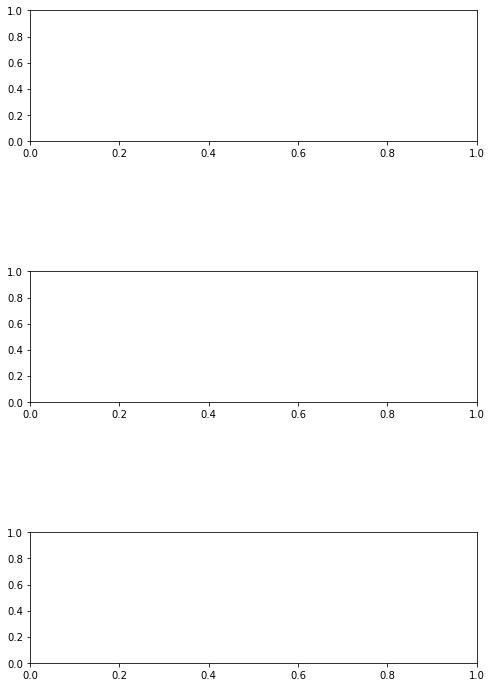

In [5]:
fig,ax=plots.multi(1,3,figsize=(8,12))
waves=[]
pixels=[]
for im in [5,8,11,14,17,20,23,26] :
    # read and bias subtract
    nekr=red.reduce(im)
    # extract
    nekrec=trace.extract(nekr)
    # wavelength calibrate
    wav.identify(nekrec,thresh=50,rad=7)
    
    # save pixels of lines
    pixels.append(wav.pix)
    lab='{:d} {:f}'.format(im,nekr.header['TELROT'])
    
    # plot pixel locations relative to those of first images
    ax[0].scatter(wav.waves,wav.pix-pixels[0],label=lab)
    # fit slope of pixel differences as f(wavelength) and plot fit
    fit=np.polyfit(wav.waves[4:],wav.pix[4:]-pixels[0][4:],deg=1)
    x=np.arange(4500,7000)
    ax[0].plot(x,fit[0]*x+fit[1])
    
    #plot FWHM of lines
    ax[1].scatter(wav.waves,wav.fwhm,label=lab)
    
    # slope vs FWHM
    ax[2].scatter(fit[0],wav.fwhm[4:].mean(),label=lab)
    
ax[0].set_ylabel('Pixel shift of line from initial rot')
ax[0].set_xlabel('Wavelength')
ax[0].legend()
ax[1].set_ylabel('FWHM of line')
ax[1].set_xlabel('Wavelength')
ax[1].legend()
ax[2].set_ylabel('FWHM of line')
ax[2].set_xlabel('Slope of pixel shift')
ax[2].set_xlim(-0.0008,0.0001)
ax[2].legend()
fig.tight_layout()


The wavelength range is limited, but it does  perhaps seem that these slope changes are not matching those for the external lamps ...

A correlation between slope and FWHm still seems to exist.

<h3> Internal vs external lamps

How do wavelength scales from internal and external lamps compare?

In [6]:
%matplotlib qt
extwav=spectra.WaveCal('./KOSMOS_HeNe.fits')
hene=red.reduce(6)
# extract
heneec=trace.extract(hene)
# wavelength calibrate
extwav.identify(heneec,thresh=50,rad=7,plot=True)


intwav=spectra.WaveCal('./KOSMOS_NeKr.fits')
nekr=red.reduce(5)
# extract
nekrec=trace.extract(nekr)
# wavelength calibrate
intwav.identify(nekrec,thresh=50,rad=7,plot=True)



FileNotFoundError: [Errno 2] No such file or directory: './KOSMOS_HeNe.fits'

NOte that NeKr doesn't have lines shortward of 5800

In [7]:
%matplotlib inline
plt.figure()
ext=extwav.wave(image=heneec.shape[1])
int=intwav.wave(image=heneec.shape[1])
plt.plot(int,ext-int)
plt.xlim(5700,7100)
plt.ylim(-5,0)
extwav.model.domain
extwav.model.c0.value

disp=extwav.model.c1.value/(extwav.model.domain[1]-extwav.model.domain[0])
print(disp)

NameError: name 'extwav' is not defined

<Figure size 432x288 with 0 Axes>

<h2> Wavelength calibration

In [8]:
%matplotlib qt

In [11]:
red=imred.Reducer('KOSMOS')
red.dir='/home/holtz/raw/apo/oct21/UT211206'
blue_int_1=red.sum([26,27,28])
blue_int_2c=red.sum([29,30,31])
blue_int_2l=red.sum([32,33,34])
blue_int_2h=red.sum([35,36,37])
red_int_1=red.sum([38,39,40])
red_int_2c=red.sum([41,42,43])
red_int_2l=red.sum([44,45,46])
red_int_2h=red.sum([47,48,49])

INSTRUMENT: KOSMOS   config: 
  will use format:  .//*{:04d}.f*.fits*
         gain:  [0.6]    rn: [ 5.]
         scale:  None   
  Biastype : 1
  Bias box: 
    SC    NC    SR    NR
  2055    43    20  4056 
  2105    43    20  4056 
  Trim box: 
    SC    NC    SR    NR
     0  2048     0  4096 
     0  2048     0  4096 
  Norm box: 
    SC    NC    SR    NR
  1000    51  2000    51 
  Reading file: /home/holtz/raw/apo/oct21/UT211206/Ne_blue_1.0026.fits
  subtracting overscan vector 
  subtracting overscan vector 
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  Reading file: /home/holtz/raw/apo/oct21/UT211206/Ar_blue_1.0027.fits
  subtracting overscan vector 
  subtracting overscan vector 
INFO: array provided for uncertainty; assuming it is a StdDevUncertainty. [astropy.nddata.ccddata]
  Reading file: /home/holtz/raw/apo/oct21/UT211206/Kr_blue_1.0028.fits
  subtracting overscan vector 
  subtracting overscan vector 
INFO: array pr

In [31]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_blue_waves.fits')
ims=[blue_int_1,blue_int_2c, blue_int_2l, blue_int_2h]
lags=[range(-100,100),range(-100,100),range(-600,-550),range(550,600)]
for im,lag in zip(ims,lags) :
    arcec=trace.extract(im)
    tmp=copy.deepcopy(wav)
    tmp.identify(arcec,thresh=100,plot=True,rad=5,lags=lag,file='henearkr.dat')
    tmp.weights[:] = 1.
    tmp.identify(arcec,thresh=100,plot=True,rad=5,lags=range(-50,50),file='henearkr.dat')

  rms:    0.154 Angstroms (26 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-100, 100)
  Derived pixel shift from input wcal:  [ 4.42656928]
  See identified lines.
  rms:    1.471 Angstroms (35 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    1.471 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-50, 50)
  Derived pixel shift from input wcal:  [ -1.51595493e-07]
  See identified lines.
  rms:    1.471 Angstroms (35 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finis

/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    1.737 Angstroms (38 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    1.737 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-50, 50)
  Derived pixel shift from input wcal:  [ -4.12696885e-07]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    1.951 Angstroms (39 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    1.951 Anstroms
  input from plot window...

  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-600, -550)
  Derived pixel shift from input wcal:  [-568.14672786]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   18.635 Angstroms (25 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   18.635 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-50, 50)
  Derived pixel shift from input wcal:  [-0.00057285]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    7.997 Angstroms (28 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    7.997 Anstroms
  input from plot window...


KeyboardInterrupt: 

In [17]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_red_waves.fits')
ims=[red_int_1,red_int_2c, red_int_2l, red_int_2h]
lags=[range(-100,100),range(-100,100),range(-600,-550),range(550,600)]
for im,lag in zip(ims,lags) :
    arcec=trace.extract(im)
    tmp=copy.deepcopy(wav)
    tmp.identify(arcec,thresh=100,plot=True,rad=20,lags=lag)
    tmp.weights[:] = 1.
    tmp.identify(arcec,thresh=100,plot=True,rad=10)   

  rms:    0.177 Angstroms (50 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-100, 100)
  Derived pixel shift from input wcal:  [ -7.70421593e-09]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   33.953 Angstroms (42 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   33.953 Anstroms
  input from plot window...
  rms:    7.608 Anstroms
  input from plot window...
  rms:    6.915 Anstroms
  input from plot window...
  rms:    6.804 Anstroms
  input from plot window...
  rms:    6.418 Anstroms
  input from plot window...
  rms:    6.415 Anstroms
  input from plot window...
  rms:    4.658 Anstroms
  input from plot window...
  rms:    3.460 Anstroms
  input from plot window...
  rms:    1.449 Anstroms
  input from plot window...
  rms:    0.963 Anstroms
  input from plot window...
  rms:    0.617 Anstroms
  input from plot window...
  rms:    0.202 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-300, 300)
  Derived p

/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   21.404 Angstroms (38 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   21.404 Anstroms
  input from plot window...
  rms:    9.874 Anstroms
  input from plot window...
  rms:    8.249 Anstroms
  input from plot window...
  rms:    6.909 Anstroms
  input from plot window...
  rms:    4.957 Anstroms
  input from plot window...
  rms:    4.241 Anstroms
  input from plot window...
  rms:    2.310 Anstroms
  input from plot window...
  rms:    2.082 Anstroms
  input from plot window...
  rms:    1.309 Anstroms
  input from plot window...
  rms:    0.415 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-300, 300)
  Derived pixel shift from input wcal:  [ -6.42326086e-08]
  See identified lines.
  rms:    2.331 Angstroms (38 line

In [22]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_blue_waves.fits')
arcec=trace.extract(blue_int_1)
wav.identify(arcec,thresh=100,plot=True,file='henearkr.dat',lags=np.arange(-100,100))
fw_blue_1=wav.fwhm

  rms:    0.154 Angstroms (26 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  [-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72  -71
  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59  -58  -57  -56
  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41
  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26
  -25  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  -12  -11
  -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1    2    3    4
    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19
   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34
   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49
   50   51   52   53   54   55   56   5

In [23]:
wav.write('KOSMOS_blue_cent_waves.fits')

type,degree,ydegree,waves [35],waves_order [35],orders [1],index [1],pix0 [1],pix [35],y [35],weights [35],"spectrum [1,4096]"
str9,int64,int64,float64,int64,int64,int64,float64,float64,int64,float64,float64
chebyshev,3,2,4273.96943 .. 6532.8824,1 .. 1,1,0,-1.87913458536,3231.52173904 .. 92.1397033907,0 .. 0,1.0 .. 1.0,177524.715059 .. 542.652079914


In [24]:
arcec=trace.extract(blue_int_2c)
wav.identify(arcec,thresh=100,plot=True)
fw_blue_2cent=wav.fwhm

  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-300, 300)
  Derived pixel shift from input wcal:  [-3.98105279]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    0.250 Angstroms (24 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    0.250 Anstroms
  input from plot window...



In [35]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_blue_waves.fits')
tmp=copy.deepcopy(wav)
arcec=trace.extract(blue_int_2l)
tmp.identify(arcec,plot=True,lags=range(-600,-550),file='henearkr.dat')
tmp.weights[:] = 1.
tmp.identify(arcec,plot=True,file='henearkr.dat',lags=range(-100,100))
tmp.write('KOSMOS_blue_low_waves.fits')

  rms:    0.154 Angstroms (26 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-600, -550)
  Derived pixel shift from input wcal:  [-568.14672786]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   18.635 Angstroms (25 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   18.635 Anstroms
  input from plot window...
  rms:    2.969 Anstroms
  input from plot window...
  rms:    2.664 Anstroms
  input from plot window...
  rms:    2.723 Anstroms
  input from plot window...
  rms:    2.725 Anstroms
  input from plot window...
  rms:    2.760 Anstroms
  input from plot window...
  rms:    2.659 Anstroms
  input from plot window...
  rms:    2.724 Anstroms
  input from plot window...
  rms:    2.002 Anstroms
  input from plot window...
  rms:    0.751 Anstroms
  input from plot window...
  rms:    0.488 Anstroms
  input from plot window...
  rms:    0.326 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-100, 100)
  Derived p

/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    1.653 Angstroms (27 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    1.653 Anstroms
  input from plot window...
  rms:    1.432 Anstroms
  input from plot window...
  rms:    1.166 Anstroms
  input from plot window...
  rms:    1.117 Anstroms
  input from plot window...
  rms:    0.650 Anstroms
  input from plot window...
  rms:    0.482 Anstroms
  input from plot window...
  rms:    0.340 Anstroms
  input from plot window...
  rms:    0.286 Anstroms
  input from plot window...
  rms:    0.246 Anstroms
  input from plot window...
  rms:    0.220 Anstroms
  input from plot window...
  rms:    0.191 Anstroms
  input from plot window...
  rms:    0.183 Anstroms
  input from plot window...



type,degree,ydegree,waves [27],waves_order [27],orders [1],index [1],pix0 [1],pix [27],y [27],weights [27],"spectrum [1,4096]"
str9,int64,int64,float64,int64,int64,int64,float64,float64,int64,float64,float64
chebyshev,3,2,4044.418 .. 6163.5939,1 .. 1,1,0,-574.452436382,3011.54339271 .. 14.8497515789,0 .. 0,1.0 .. 1.0,888.045968849 .. 402.346839096


In [36]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_blue_waves.fits')
tmp=copy.deepcopy(wav)
arcec=trace.extract(blue_int_2h)
tmp.identify(arcec,plot=True,lags=range(550,600),file='henearkr.dat')
tmp.weights[:] = 1.
tmp.identify(arcec,plot=True,file='henearkr.dat',lags=range(-100,100))
tmp.write('KOSMOS_blue_high_waves.fits')

  rms:    0.154 Angstroms (26 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(550, 600)
  Derived pixel shift from input wcal:  [ 579.63620441]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   32.177 Angstroms (36 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   32.177 Anstroms
  input from plot window...
  rms:   13.832 Anstroms
  input from plot window...
  rms:   12.600 Anstroms
  input from plot window...
  rms:   12.600 Anstroms
  input from plot window...
  rms:    3.665 Anstroms
  input from plot window...
  rms:    3.382 Anstroms
  input from plot window...
  rms:    3.382 Anstroms
  input from plot window...
  rms:    3.122 Anstroms
  input from plot window...
  rms:    3.059 Anstroms
  input from plot window...
  rms:    3.071 Anstroms
  input from plot window...
  rms:    3.123 Anstroms
  input from plot window...
  rms:    3.172 Anstroms
  input from plot window...
  rms:    3.231 Anstroms
  input from plot window...
  rms:    3.232 Anstroms
  input 

type,degree,ydegree,waves [39],waves_order [39],orders [1],index [1],pix0 [1],pix [39],y [39],weights [39],"spectrum [1,4096]"
str9,int64,int64,float64,int64,int64,int64,float64,float64,int64,float64,float64
chebyshev,3,2,4300.48652 .. 7032.4127,1 .. 1,1,0,573.322619756,3771.60835655 .. 6.18826791171,0 .. 0,1.0 .. 1.0,4514.25392183 .. 610.869800215


In [37]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_red_waves.fits')
tmp=copy.deepcopy(wav)
arcec=trace.extract(red_int_2l)
tmp.identify(arcec,plot=True,lags=range(-600,-550),file='henearkr.dat')
tmp.weights[:] = 1.
tmp.identify(arcec,plot=True,file='henearkr.dat',lags=range(-100,100))
tmp.write('KOSMOS_red_low_waves.fits')

  rms:    0.177 Angstroms (50 lines)
  extracting ... (may take some time,
                   consider threads= if multithreading is available

  cross correlating with reference spectrum using lags:  range(-600, -550)
  Derived pixel shift from input wcal:  [-558.028605]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:   46.327 Angstroms (52 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:   46.327 Anstroms
  input from plot window...
  rms:   38.971 Anstroms
  input from plot window...
  rms:   28.058 Anstroms
  input from plot window...
  rms:    4.162 Anstroms
  input from plot window...
  rms:    4.074 Anstroms
  input from plot window...
  rms:    4.111 Anstroms
  input from plot window...
  rms:    4.134 Anstroms
  input from plot window...
  rms:    4.156 Anstroms
  input from plot window...
  rms:    4.203 Anstroms
  input from plot window...
  rms:    4.244 Anstroms
  input from plot window...
  rms:    0.498 Anstroms
  input from plot window...
  rms:    0.320 Anstroms
  input from plot window...

  cross correlating with reference spectrum using lags:  range(-100, 100)
  Derived p

/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    2.122 Angstroms (60 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    2.122 Anstroms
  input from plot window...
  rms:    1.763 Anstroms
  input from plot window...
  rms:    1.695 Anstroms
  input from plot window...
  rms:    1.604 Anstroms
  input from plot window...
  rms:    1.600 Anstroms
  input from plot window...
  rms:    1.587 Anstroms
  input from plot window...
  rms:    1.574 Anstroms
  input from plot window...
  rms:    1.471 Anstroms
  input from plot window...
  rms:    1.457 Anstroms
  input from plot window...
  rms:    1.438 Anstroms
  input from plot window...
  rms:    1.273 Anstroms
  input from plot window...
  rms:    0.467 Anstroms
  input from plot window...
  rms:    0.230 Anstroms
  input from plot window...



type,degree,ydegree,waves [60],waves_order [60],orders [1],index [1],pix0 [1],pix [60],y [60],weights [60],"spectrum [1,4096]"
str9,int64,int64,float64,int64,int64,int64,float64,float64,int64,float64,float64
chebyshev,3,2,5400.562 .. 8919.5007,1 .. 1,1,0,-558.028749697,3583.12727206 .. 94.4552683588,0 .. 0,1.0 .. 0.0,1175.40751572 .. 735.392761334


In [42]:
#wav=spectra.WaveCal('KOSMOS/KOSMOS_red_waves.fits')
#tmp=copy.deepcopy(wav)
#arcec=trace.extract(red_int_2h)
#tmp.identify(arcec,plot=True,lags=range(550,600),file='henearkr.dat')
tmp.weights[:] = 1.
tmp.identify(arcec,plot=True,file='henearkr.dat',lags=range(-100,100))
tmp.write('KOSMOS_red_high_waves.fits')

  cross correlating with reference spectrum using lags:  range(-100, 100)
  Derived pixel shift from input wcal:  [  1.54481052e-06]


/home/local/Anaconda3-2020.02/envs/py3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


  See identified lines.
  rms:    1.655 Angstroms (43 lines)
  Input in plot window: 
       l : to remove all lines to left of cursor
       r : to remove all lines to right of cursor
       n : to remove line nearest cursor x position
       anything else : finish and return
  rms:    1.655 Anstroms
  input from plot window...
  rms:    1.667 Anstroms
  input from plot window...
  rms:    1.490 Anstroms
  input from plot window...
  rms:    0.491 Anstroms
  input from plot window...
  rms:    0.338 Anstroms
  input from plot window...



type,degree,ydegree,waves [43],waves_order [43],orders [1],index [1],pix0 [1],pix [43],y [43],weights [43],"spectrum [1,4096]"
str9,int64,int64,float64,int64,int64,int64,float64,float64,int64,float64,float64
chebyshev,3,2,6096.163 .. 9784.5,1 .. 1,1,0,566.348385416,4056.45755579 .. 427.23073457,0 .. 0,1.0 .. 1.0,601.530828094 .. 1480.13128077


In [ ]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_red_waves.fits')
wav=spectra.WaveCal(degree=3)
arcec=trace.extract(red_int_1)
wref=[7032,2465]
disp=-0.99
wav.identify(arcec,thresh=50,plot=True,rad=5,inter=True,file='henearkr.dat')

In [ ]:
wav.identify(arcec,file='henearkr.dat',thresh=50,plot=True,rad=3)
#wav.write('KOSMOS_red_waves.fits')

In [ ]:
tmp=copy.deepcopy(wav)
arcec=trace.extract(red_int_2c)
tmp.identify(arcec,plot=True)

In [ ]:
tmp=copy.deepcopy(wav)
arcec=trace.extract(red_int_2l)
tmp.identify(arcec,plot=True,lags=range(-600,-550))

In [ ]:
tmp.identify(arcec,rad=3,plot=True,file='henearkr.dat')

In [ ]:
wav.identify(arcec,file='henearkr.dat',rad=3,thresh=100,plot=True)

In [ ]:
wav.write('KOSMOS_red_1.fits')


<h2> 1.18 arcsec slit

In [ ]:
red=imred.Reducer('KOSMOS',dir='/home/holtz/raw/apo/oct21/Q4NM01/UT211031/kosmos',verbose=True)
trace=spectra.Trace('KOSMOS/KOSMOS_trace.fits')
wav=spectra.WaveCal('./KOSMOS_HeNe.fits')

In [ ]:
arc=red.sum([14,15,16])
arcec=trace.extract(arc,plot=t)

In [ ]:
#%matplotlib qt
#t=tv.TV()
t.tv(arc)

In [ ]:
#plt.figure()
plt.clf()
plt.plot(arcec.data[0])
plt.plot(wav.spectrum[0],color='r')
#plt.clf()
#plt.plot(arcec.data[0]/arcec.uncertainty.array[0])
print(wav.waves)
print(wav.pix)

In [ ]:
wav=spectra.WaveCal('KOSMOS/KOSMOS_blue_waves.fits')
wav.identify(arcec,thresh=20,
            fit=True,plot=True,pixplot=True,rad=20)